In [86]:
import numpy as np
np.random.seed(1)
m = 400 # number of examples
N = int(m/2) # number of points per class
D = 2 # dimensionality
X = np.zeros((m,D)) # data matrix where each row is a single example
Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
a = 4 # maximum ray of the flower

for j in range(2):
    ix = range(N*j,N*(j+1))
    t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
    r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    Y[ix] = j

X = X.T
Y = Y.T


In [87]:
import matplotlib.pyplot as plt

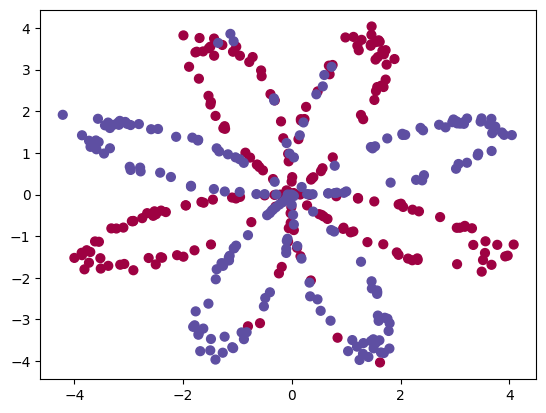

In [88]:
# Visualize the data:
plt.scatter(X[0], X[1], c=Y[0], s=40, cmap=plt.cm.Spectral)

In [89]:
X = X.reshape([400, 2])
Y=Y[0]
# shuffle data
random_list = np.random.choice(range(400), 400, replace=False)
random_train = random_list[0:320]
random_test = random_list[320:]
X_train, y_train = X[(random_train)], Y[(random_train)]
X_test, y_test = X[(random_test)], Y[(random_test)]

X_train.shape, y_train.shape, X_test.shape, y_test.shape


((320, 2), (320,), (80, 2), (80,))

In [90]:
def sigmoid(z):
    
    s = 1 / (1 + np.exp(-z))
    return s

In [91]:
def initialize_with_zeros(dim):
    
    w = np.zeros(shape=(dim, 1), dtype=np.float32)
    b = 0.0
    
    return w, b


In [92]:
def propagate(w, b, X, Y):
    
    m = X.shape[1]
    
    # forward propagation (from x to cost)
    # compute activation
    A = sigmoid(w.T @ X + b)
    # compute cost by using np.dot to perform multiplication
    cost = np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A)) / -m
    
    # backward propagation (to find grad)
    dw = X @ (A - Y).T / m
    db = np.sum(A - Y) / m
    
    cost = np.squeeze(np.array(cost))
    
    grads = {'dw': dw, 'db': db}
    return grads, cost

In [93]:
import copy

def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False):
   
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    
    costs = []
    
    for i in range(num_iterations):
        # cost and gradient calculation
        grads, cost = propagate(w, b, X, Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule
        w -= learning_rate * dw
        b -= learning_rate * db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
            # Print the cost every 100 training iterations
            if print_cost:
                print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs


In [94]:
def predict(w, b, X):
    
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    # compute vector 'A' predicting the probabilities of a cat being present in the picture
    A = sigmoid(w.T @ X + b)
    
    for i in range(A.shape[1]):
        # convert probabilities A[0, i] to actual predictions p[0, i]
        if A[0, i] > 0.5:
            Y_prediction[0, i] = 1
        else:
            Y_prediction[0, i] = 0
            
    return Y_prediction

In [95]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
     
    w, b = initialize_with_zeros(dim=X_train.shape[0])
    
    # Gradient descent
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "params"
    w = params['w']
    b = params['b']
    
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    
    # Print train/test Errors
    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [96]:
logistic_regression_model = model(X_train.T, y_train, X_test.T, y_test, num_iterations=10000, learning_rate=0.0002, print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.693082
Cost after iteration 200: 0.693019
Cost after iteration 300: 0.692958
Cost after iteration 400: 0.692898
Cost after iteration 500: 0.692840
Cost after iteration 600: 0.692783
Cost after iteration 700: 0.692727
Cost after iteration 800: 0.692673
Cost after iteration 900: 0.692621
Cost after iteration 1000: 0.692570
Cost after iteration 1100: 0.692520
Cost after iteration 1200: 0.692471
Cost after iteration 1300: 0.692423
Cost after iteration 1400: 0.692377
Cost after iteration 1500: 0.692331
Cost after iteration 1600: 0.692287
Cost after iteration 1700: 0.692243
Cost after iteration 1800: 0.692201
Cost after iteration 1900: 0.692160
Cost after iteration 2000: 0.692119
Cost after iteration 2100: 0.692080
Cost after iteration 2200: 0.692041
Cost after iteration 2300: 0.692004
Cost after iteration 2400: 0.691967
Cost after iteration 2500: 0.691931
Cost after iteration 2600: 0.691895
Cost after iteration 2700: 0.691861
Cost

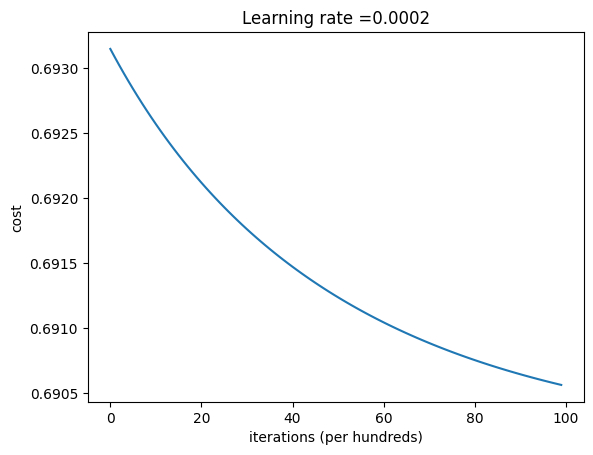

In [97]:
costs = np.squeeze(logistic_regression_model['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(logistic_regression_model["learning_rate"]))
plt.show()